## Random initial guesses

### Polynomial function test

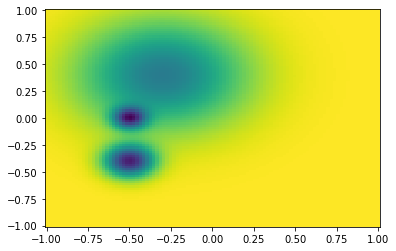

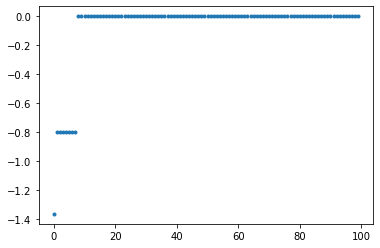

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.optimize import minimize


def double_well(x, a, w, c):
    if x.ndim == 1:
        x = x[:, None, None]
    dw = 0
    for i in range(len(a)):
        xi = x - c[i][:, None, None]
        ri = la.norm(xi, axis=0)
        dw -= a[i] * np.exp(- ri**2 / w[i] ** 2)
    return dw


p = ((1.2, 1, 0.8), (0.15, 0.1, 0.5),
     (np.array([-0.5, -0.4]), np.array([-0.5, 0]), np.array([-0.3, 0.4])))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.pcolormesh(X, Y, double_well(np.array([X, Y]), *p))

N = 100
min = np.array([])
for i in range(N):
    x = np.random.uniform(-5, 5, size=2)
    res = minimize(double_well, x0=x, args=p)
    min = np.append(min, res.fun)
plt.figure()
plt.plot(np.sort(min), '.')


### 4 site

In [1]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([4], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    __, __, info = G.equalzie('UTv', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]

/Users/nottforestfc/Library/CloudStorage/OneDrive-RiceUniversity/Documents/Research/Fermi Hubbard tweezer array/Computation/src/DVR/core.py:300: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "delta" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 1d, A), Tuple(slice<a:b>, none))
 
There are 22 candidate implementations:
     - Of which 20 did not match due to:
     Overload of function 'getitem': File: <numerous>: Line N/A.
       With argument(s): '(array(float64, 1d, A), Tuple(slice<a:b>, none))':
      No match.
     - Of which 2 did not match due to:
     Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 166.
       With argument(s): '(array(float64, 1d, A), Tuple(slice<a:b>, none))':
      Rejected as the implementation raised a specific error:
        NumbaTypeError: unsupported array inde

Initial trap depths: [0.96552266 1.01358699]
Initial trap centers:
[[-1.46294929  0.        ]
 [-0.477013    0.        ]]
i=50	c=[0.03620138 0.00458052 0.00874961]	c_i=0.04953150834938595	c_i//2-c_i=1.5001041643100317
i=100	c=[0.03623706 0.00034548 0.00908995]	c_i=0.04567249985964549	c_i//2-c_i=0.01609935351577315
i=150	c=[0.03105833 0.00310113 0.00015014]	c_i=0.03430960115601584	c_i//2-c_i=0.011861143366658139
i=200	c=[3.11433780e-02 3.00924678e-03 1.87428828e-06]	c_i=0.03415449910995346	c_i//2-c_i=0.011218912198242892
i=250	c=[3.13040690e-02 1.30821361e-02 4.90180533e-05]	c_i=0.04443522309662643	c_i//2-c_i=0.022138054398513816
i=300	c=[3.11078983e-02 1.22450571e-05 1.22908763e-05]	c_i=0.03113243426837491	c_i//2-c_i=0.0030329428185600672
i=350	c=[3.11033723e-02 7.96346812e-07 3.43724759e-06]	c_i=0.031107605868973803	c_i//2-c_i=0.004874898084984255
i=400	c=[3.11015558e-02 6.80211686e-07 2.06430482e-07]	c_i=0.031102442437160642	c_i//2-c_i=0.00305036259530498
i=450	c=[3.11014482e-02 6.79

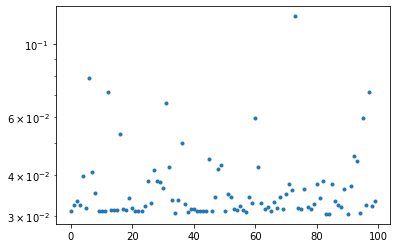

In [2]:
plt.plot(c[:, -1], '.')
plt.yscale('log')

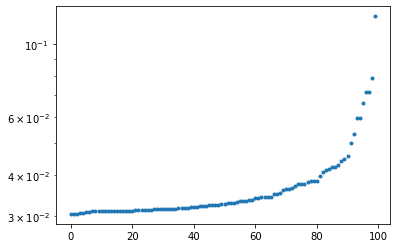

In [3]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')

0.012520524581665185


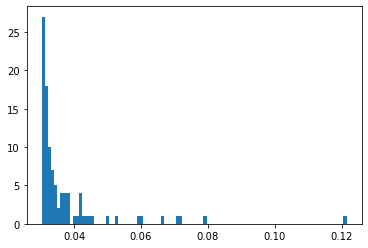

In [4]:
plt.hist(cs, bins=100)
print(np.std(cs))

In [1]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([4], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    __, __, info = G.equalzie('Tv', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]

/Users/nottforestfc/Library/CloudStorage/OneDrive-RiceUniversity/Documents/Research/Fermi Hubbard tweezer array/Computation/src/DVR/core.py:300: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "delta" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 1d, A), Tuple(slice<a:b>, none))
 
There are 22 candidate implementations:
     - Of which 20 did not match due to:
     Overload of function 'getitem': File: <numerous>: Line N/A.
       With argument(s): '(array(float64, 1d, A), Tuple(slice<a:b>, none))':
      No match.
     - Of which 2 did not match due to:
     Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 166.
       With argument(s): '(array(float64, 1d, A), Tuple(slice<a:b>, none))':
      Rejected as the implementation raised a specific error:
        NumbaTypeError: unsupported array inde

Initial trap depths: [0.98008607 1.01169081]
Initial trap centers:
[[-1.46348105  0.        ]
 [-0.53855739  0.        ]]
i=50	c=[0.04251895 0.01221955 0.01932052]	c_i=0.07405902760592575	c_i//2-c_i=0.0042440377763152265
i=100	c=[0.04271984 0.00185633 0.0205298 ]	c_i=0.06510597529513062	c_i//2-c_i=0.0039031327156404533
i=150	c=[0.02873766 0.0214565  0.00452848]	c_i=0.05472263948634565	c_i//2-c_i=0.02136077381162524
i=200	c=[3.13157510e-02 1.54328540e-02 1.33910532e-05]	c_i=0.04676199605130269	c_i//2-c_i=0.017272085580368683
i=250	c=[3.13073735e-02 1.54471887e-02 1.40906354e-06]	c_i=0.04675597122234062	c_i//2-c_i=0.006218093173522787
i=300	c=[3.12914625e-02 1.54601885e-02 2.79072509e-05]	c_i=0.04677955822589057	c_i//2-c_i=0.0005223052760472413
i=350	c=[0.03120035 0.00513483 0.00022161]	c_i=0.03655679076320358	c_i//2-c_i=0.016757953285710732
i=400	c=[0.03102057 0.00028992 0.00021695]	c_i=0.031527442185638285	c_i//2-c_i=0.015359506186769484
i=450	c=[3.10197997e-02 6.49295697e-06 2.1557521

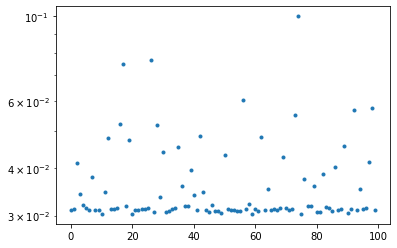

In [10]:
plt.plot(c[:, -1], '.')
plt.yscale('log')

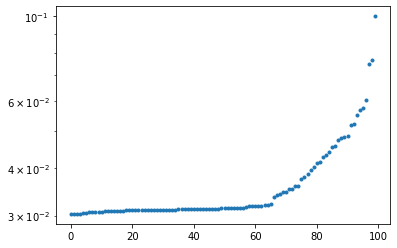

In [8]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')

0.01108272427996642


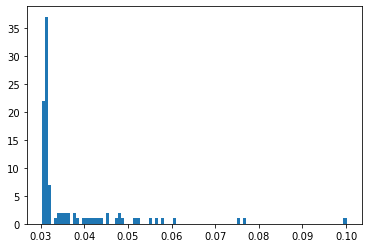

In [9]:
plt.hist(cs, bins=100)
print(np.std(cs))

### 3 site

In [8]:
import numpy as np
from Hubbard.equalizer import *

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([3], dtype=int),
                          band=1,
                          dim=1,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    __, __, __, info = G.equalzie('Uvt', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]


Initial trap depths: [1.04642029 1.0390392 ]
Initial waists:
[[0.93540762 1.        ]
 [1.09893349 1.        ]]
Initial trap centers:
[[-1.09318762  0.        ]
 [ 0.          0.        ]]
i=50	c=[3.48441828e-02 7.00480555e-15 7.29995671e-03]	c_i=0.042144139510788575	c_i//2-c_i=0.04096693825588753
i=100	c=[2.21830002e-02 4.16363690e-15 1.97080162e-03]	c_i=0.024153801843648053	c_i//2-c_i=0.01799032331662859
i=150	c=[1.88048731e-03 1.09468275e-14 1.04987006e-04]	c_i=0.001985474318823649	c_i//2-c_i=0.02423177008461462
i=200	c=[4.16345158e-04 1.15107244e-14 1.18330765e-05]	c_i=0.0004281782346683434	c_i//2-c_i=0.023725625739474728
i=250	c=[6.68652328e-03 3.35403821e-14 1.29566406e-04]	c_i=0.00681608968160935	c_i//2-c_i=0.0006854790656977243
i=300	c=[8.14345269e-05 8.98462866e-15 3.32884009e-07]	c_i=8.176741093282095e-05	c_i//2-c_i=0.00402836931706484
i=350	c=[8.13812905e-05 2.25571319e-14 1.38927693e-06]	c_i=8.277056746762809e-05	c_i//2-c_i=0.0003459744146890283
i=400	c=[8.11061048e-05 1.97

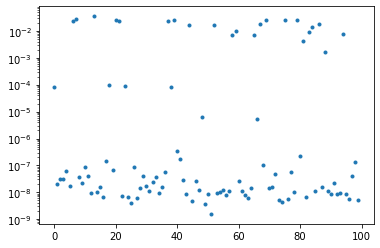

In [9]:
import matplotlib.pyplot as plt

plt.plot(c[:, -1], '.')
plt.yscale('log')

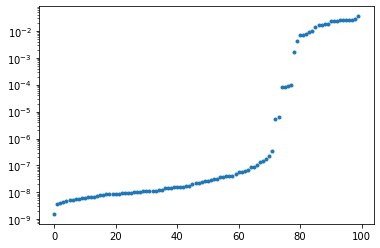

In [10]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')

0.008372219433460731


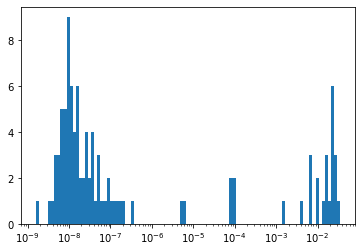

In [11]:
bins = np.geomspace(cs.min(), cs.max(), 100)
plt.hist(cs, bins=bins)
print(np.std(cs))
plt.xscale('log')

In [12]:
cidx = np.argmin(c[:, -1])
print('x0 =', c[cidx, :v0_len])
print('x =', c[cidx, v0_len:-1])
print('f =', c[cidx, -1])

x0 = [ 0.93806088  0.92822857  0.99867663  1.          0.96241108  1.
 -0.9144365   0.          0.          0.        ]
x = [ 0.95756265  0.9497517   1.02245729  1.          0.9063588   1.
 -1.0389969   0.          0.          0.        ]
f = 1.5755163593193237e-09


In [5]:
import numpy as np
from Hubbard.plot import *

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v, fix_u, fix_t, fix_v = G.str_to_flags('UTv')

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c


offset = np.array([0.91794318,  0.93745579, -0.98793246,
                  0.,          0.04479769, 0.])
cost_func(offset, None)

print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


V = [-40.52829778 -40.52832592 -40.52829778]
t = [0.23163589 0.23163589]
U = [2.06138451 2.06138353 2.06138451]
V_err = 3.273500357574625e-07
t_err = 1.0664350335676979e-14
U_err = 2.2382529234108543e-07


No bounds?

In [1]:
import numpy as np
from Hubbard.plot import *

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 50
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    __, __, info = G.equalzie('UTv', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]

Initial trap depths: [1.01508539 0.90265686]
Initial trap centers:
[[-1.04710267  0.        ]
 [-0.02843146  0.        ]]
i=50	c=[0.08101514 0.00344817 0.03252719]	c_i=0.11699049760843819	c_i//2-c_i=0.04191124382363348
i=100	c=[8.07918292e-02 2.25260494e-08 3.25804198e-02]	c_i=0.11337227153110818	c_i//2-c_i=0.003618237759875881
i=150	c=[8.07919008e-02 5.08375587e-07 3.25803831e-02]	c_i=0.11337279226734062	c_i//2-c_i=2.1813603226783496e-06
i=200	c=[8.07918369e-02 1.66918752e-07 3.25804103e-02]	c_i=0.11337241412848686	c_i//2-c_i=-1.419943306962823e-07
i=250	c=[8.07918309e-02 1.39438276e-08 3.25804116e-02]	c_i=0.11337225635580067	c_i//2-c_i=0.005972577588708311
Initial trap depths: [0.94065308 0.9598252 ]
Initial trap centers:
[[-1.01145462  0.        ]
 [ 0.07655737  0.        ]]
i=50	c=[0.04533015 0.00069157 0.01169082]	c_i=0.057712536533452874	c_i//2-c_i=0.1640040719489097
i=100	c=[4.52809548e-02 2.53539416e-06 1.16691382e-02]	c_i=0.056952628393336105	c_i//2-c_i=0.0007599256463195828
i

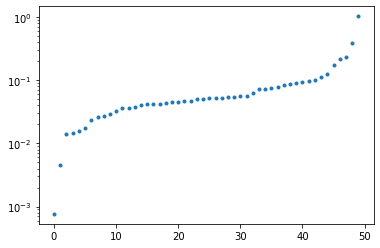

In [2]:
cs = np.sort(c[:, -1])
plt.plot(cs, '.')
plt.yscale('log')